# Kidney Disease Prediction

## Importing Libraries

In [15]:
import pandas as pd
import  numpy as np
from matplotlib import pyplot as plt
import  seaborn as sns

In [16]:
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [18]:
health_data = pd.read_csv('Project-6-kidney_disease Prediction.csv')
health_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Basic Data Analysis

### First Five Rows

In [21]:
health_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


### Last 5 Rows

In [23]:
health_data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


### Total Number of Rows and Columns in dataset

In [25]:
health_data.shape

(400, 26)

In [26]:
print(f'Number of Rows in datasets = {health_data.shape[0]}')
print(f'Number of Columns in datasets = {health_data.shape[1]}')

Number of Rows in datasets = 400
Number of Columns in datasets = 26


### List of columns

In [28]:
health_data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

### Information about the data 

In [30]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

## Data Cleaning and Transformation

'pcv', 'ws' and 'rc' columns are identified as categorical column instead of numerical.

In [33]:
health_data['pcv'] = pd.to_numeric(health_data['pcv'], errors='coerce')
health_data['wc'] = pd.to_numeric(health_data['wc'], errors='coerce')
health_data['rc'] = pd.to_numeric(health_data['rc'], errors='coerce')

In [34]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    float64
 17  wc              294 non-null    flo

### Checking and removing duplicates

In [36]:
health_data.duplicated().any()

False

There are no duplicates in the dataset

### Checking Null Values

In [39]:
health_data.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

The dataset has some missing values in the columns:


**Calculating % Null Values**

In [42]:
null_count = health_data.isna().sum().reset_index()
null_count.columns = ['Column_Name', 'Null_Values']
null_count['% Null'] = round(null_count['Null_Values']/(health_data.shape[0])*100,1)
null_count['Data_type'] = null_count['Column_Name'].apply(lambda x: 'Categorical' if health_data[x].dtype == 'object' else 'Numerical')
null_count

,Column_Name,Null_Values,% Null,Data_type
0,id,0,0.0,Numerical
1,age,9,2.2,Numerical
2,bp,12,3.0,Numerical
3,sg,47,11.8,Numerical
4,al,46,11.5,Numerical
5,su,49,12.2,Numerical
6,rbc,152,38.0,Categorical
7,pc,65,16.2,Categorical
8,pcc,4,1.0,Categorical
9,ba,4,1.0,Categorical


In [43]:
numerical_cols = health_data.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('id')
numerical_cols

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc'],
      dtype='object')

**Imputing Null Values**

In [45]:
for col in numerical_cols:
    health_data[col].fillna(health_data[col].mode()[0], inplace=True)

In [46]:
categorical_cols = health_data.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols.drop('classification')
categorical_cols

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], dtype='object')

In [47]:
for col in categorical_cols:
    health_data[col].fillna(health_data[col].mode()[0], inplace=True)

In [48]:
health_data.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

### Deleting unwanted columns

In [50]:
health_data.drop(columns=['id'],axis=1,inplace=True)

In [51]:
health_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,99.0,...,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


### Some Changes in categorical Columns 

In [53]:
health_data['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [54]:
health_data[health_data['classification']=='ckd\t']

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
37,72.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,137.0,...,28.0,6900.0,2.5,yes,yes,no,poor,no,yes,ckd\t
230,65.0,60.0,1.01,2.0,0.0,normal,abnormal,present,notpresent,192.0,...,41.0,9500.0,5.2,yes,yes,no,poor,no,no,ckd\t


In [55]:
# Replace 'ckd\t' with 'ckd'
health_data['classification'] = health_data['classification'].str.replace('ckd\t', 'ckd')

In [56]:
health_data['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [57]:
value_counts = {col: health_data[col].value_counts() for col in categorical_cols}
for col, counts in value_counts.items():
    print(f"Value counts for column '{col}':")
    print(counts)
    print()

Value counts for column 'rbc':
rbc
normal      353
abnormal     47
Name: count, dtype: int64

Value counts for column 'pc':
pc
normal      324
abnormal     76
Name: count, dtype: int64

Value counts for column 'pcc':
pcc
notpresent    358
present        42
Name: count, dtype: int64

Value counts for column 'ba':
ba
notpresent    378
present        22
Name: count, dtype: int64

Value counts for column 'htn':
htn
no     253
yes    147
Name: count, dtype: int64

Value counts for column 'dm':
dm
no       260
yes      134
\tno       3
\tyes      2
 yes       1
Name: count, dtype: int64

Value counts for column 'cad':
cad
no      364
yes      34
\tno      2
Name: count, dtype: int64

Value counts for column 'appet':
appet
good    318
poor     82
Name: count, dtype: int64

Value counts for column 'pe':
pe
no     324
yes     76
Name: count, dtype: int64

Value counts for column 'ane':
ane
no     340
yes     60
Name: count, dtype: int64



In [58]:
health_data['dm'] = health_data['dm'].str.strip()
health_data['cad'] = health_data['cad'].str.strip()

In [59]:
value_counts = {col: health_data[col].value_counts() for col in categorical_cols}

In [60]:
for col, counts in value_counts.items():
    print(f"Value counts for column '{col}':")
    print(counts)
    print() 

Value counts for column 'rbc':
rbc
normal      353
abnormal     47
Name: count, dtype: int64

Value counts for column 'pc':
pc
normal      324
abnormal     76
Name: count, dtype: int64

Value counts for column 'pcc':
pcc
notpresent    358
present        42
Name: count, dtype: int64

Value counts for column 'ba':
ba
notpresent    378
present        22
Name: count, dtype: int64

Value counts for column 'htn':
htn
no     253
yes    147
Name: count, dtype: int64

Value counts for column 'dm':
dm
no     263
yes    137
Name: count, dtype: int64

Value counts for column 'cad':
cad
no     366
yes     34
Name: count, dtype: int64

Value counts for column 'appet':
appet
good    318
poor     82
Name: count, dtype: int64

Value counts for column 'pe':
pe
no     324
yes     76
Name: count, dtype: int64

Value counts for column 'ane':
ane
no     340
yes     60
Name: count, dtype: int64



In [61]:
health_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,99.0,...,38.0,6000.0,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


## Exploratory Data Analysis (EDA) 

### Statistics

#### Basic Statistics of Numeric Features (mean, median, max, min, etc…) 

In [65]:
health_data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.675000,76.575000,1.017712,0.90000,0.395000,142.642500,56.883000,2.992875,136.978750,4.379250,12.848000,39.260000,8775.500000,4.868750
std,17.022008,13.489785,0.005434,1.31313,1.040038,76.344226,49.345921,5.630207,9.263352,2.858281,2.841008,8.191162,2597.309144,0.871606
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,99.000000,27.000000,0.900000,135.000000,3.500000,10.875000,34.000000,6975.000000,4.500000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,114.500000,44.000000,1.200000,136.000000,4.050000,13.500000,41.000000,9450.000000,5.200000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,15.000000,44.000000,9800.000000,5.200000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


#### Basic Statistics of Categorical Columns

In [67]:
health_data.describe(include='object')

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
count,400,400,400,400,400,400,400,400,400,400,400
unique,2,2,2,2,2,2,2,2,2,2,2
top,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
freq,353,324,358,378,253,263,366,318,324,340,250


#### Unique values in categorical features 

In [69]:
health_data['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

#### Correlation matrix

In [71]:
corr_data = health_data[numerical_cols].corr()
corr_data

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
age,1.000000,0.135503,-0.161959,0.087907,0.185221,0.241154,0.194760,0.134881,-0.087257,0.046351,-0.170105,-0.213961,0.118077,-0.202451
bp,0.135503,1.000000,-0.166980,0.123518,0.189561,0.149082,0.181248,0.143157,-0.107184,0.055158,-0.258133,-0.285876,0.041305,-0.208429
sg,-0.161959,-0.166980,1.000000,-0.479962,-0.292053,-0.281959,-0.246232,-0.171743,0.251464,-0.011777,0.443994,0.491157,-0.238735,0.371683
al,0.087907,0.123518,-0.479962,1.000000,0.287751,0.276669,0.347441,0.161350,-0.239490,0.092196,-0.458027,-0.470819,0.214295,-0.368210
su,0.185221,0.189561,-0.292053,0.287751,1.000000,0.619062,0.126730,0.096527,-0.062081,0.165059,-0.149018,-0.180658,0.161132,-0.149470
bgr,0.241154,0.149082,-0.281959,0.276669,0.619062,1.000000,0.111672,0.059321,-0.123325,0.042240,-0.222848,-0.249320,0.136563,-0.194739
bu,0.194760,0.181248,-0.246232,0.347441,0.126730,0.111672,1.000000,0.581618,-0.292161,0.348128,-0.515996,-0.518821,0.053479,-0.444407
sc,0.134881,0.143157,-0.171743,0.161350,0.096527,0.059321,0.581618,1.000000,-0.611418,0.200280,-0.311992,-0.334155,0.017922,-0.298676
sod,-0.087257,-0.107184,0.251464,-0.239490,-0.062081,-0.123325,-0.292161,-0.611418,1.000000,0.098621,0.317426,0.344629,-0.006303,0.281570
pot,0.046351,0.055158,-0.011777,0.092196,0.165059,0.042240,0.348128,0.200280,0.098621,1.000000,-0.067929,-0.107106,-0.066879,-0.117280


### Data Visualization

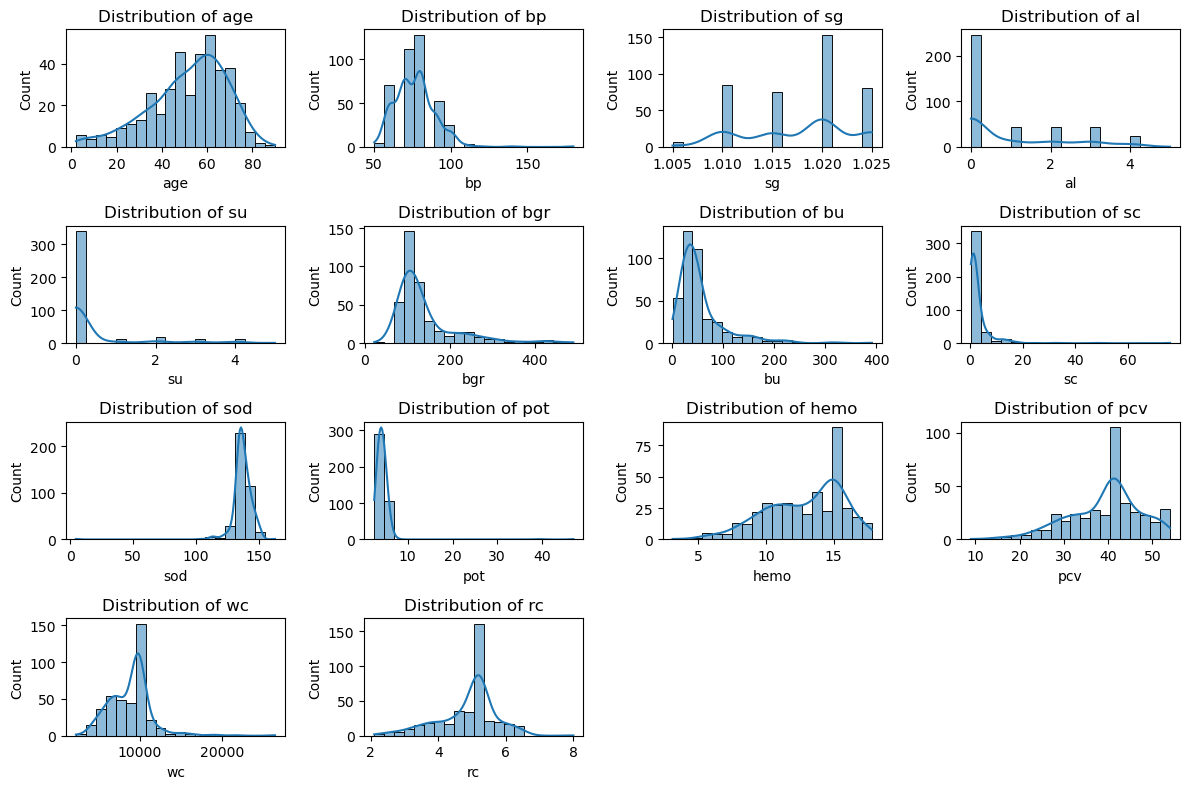

In [73]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i) 
    sns.histplot(health_data[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

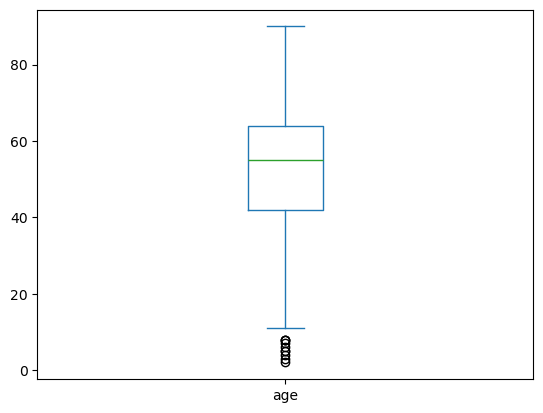

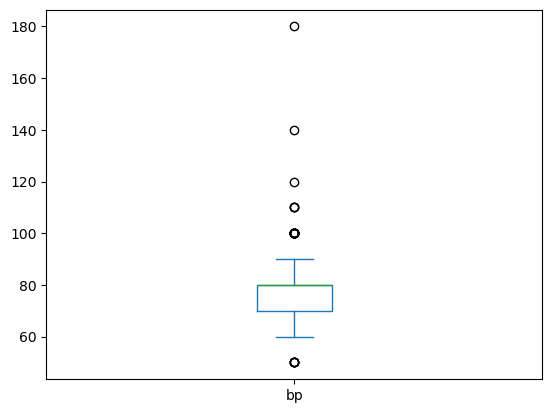

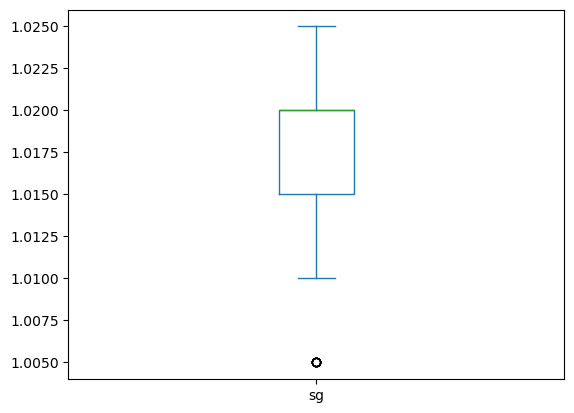

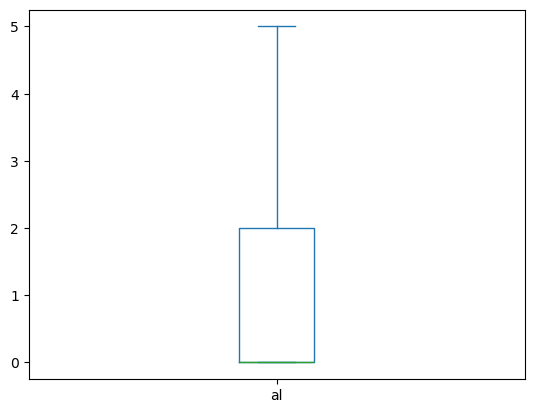

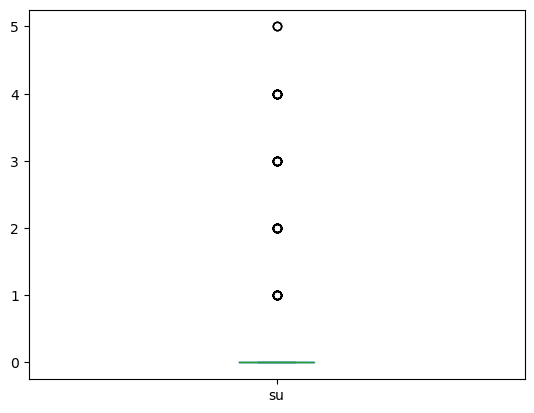

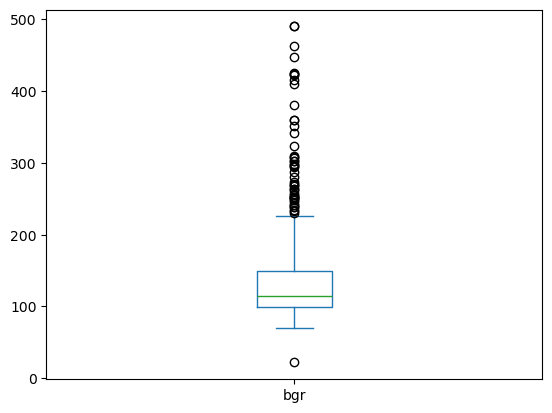

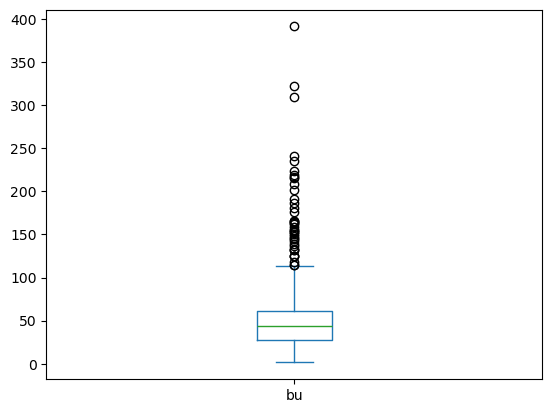

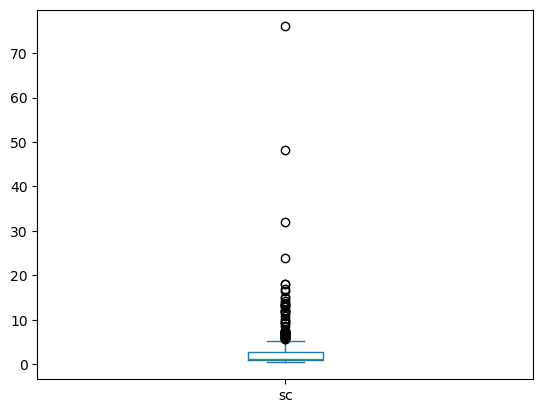

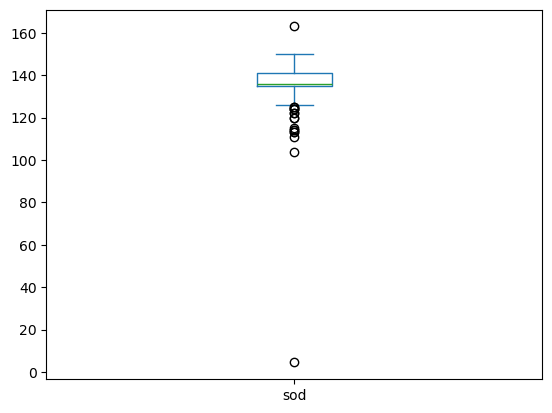

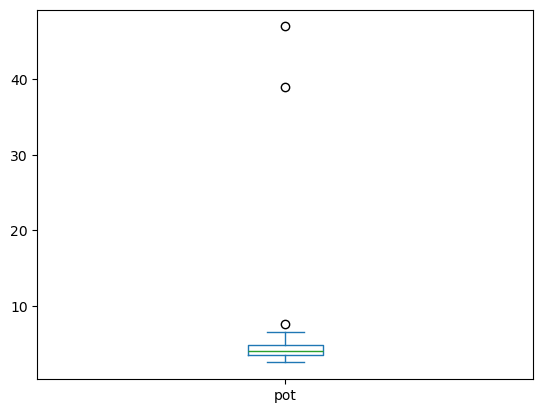

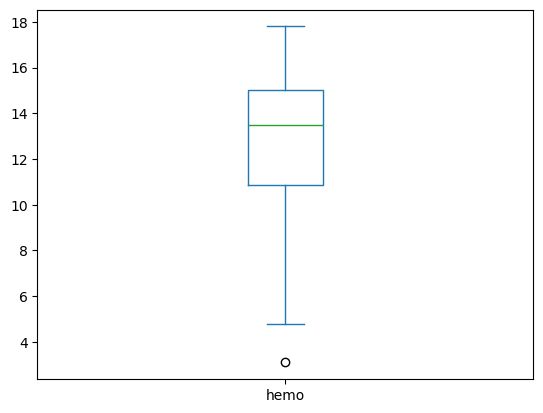

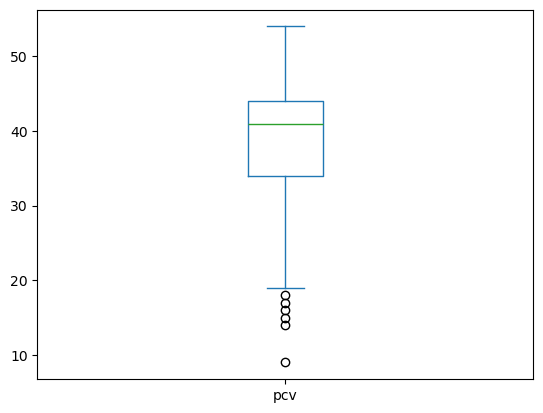

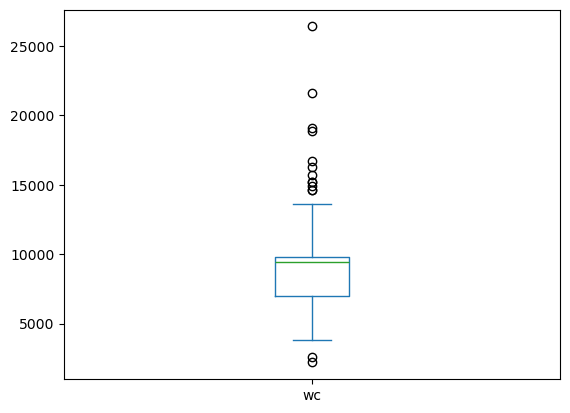

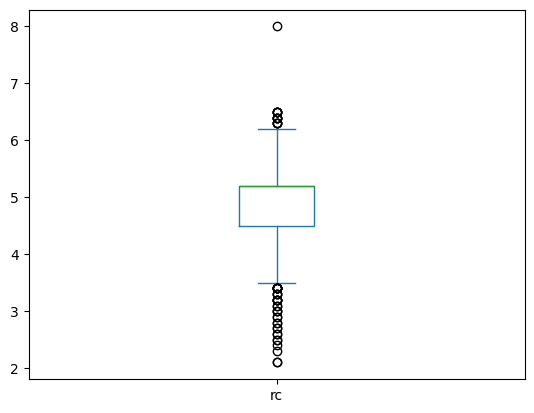

In [74]:
for col in numerical_cols:
    health_data[col].plot(kind = 'box')
    plt.show()

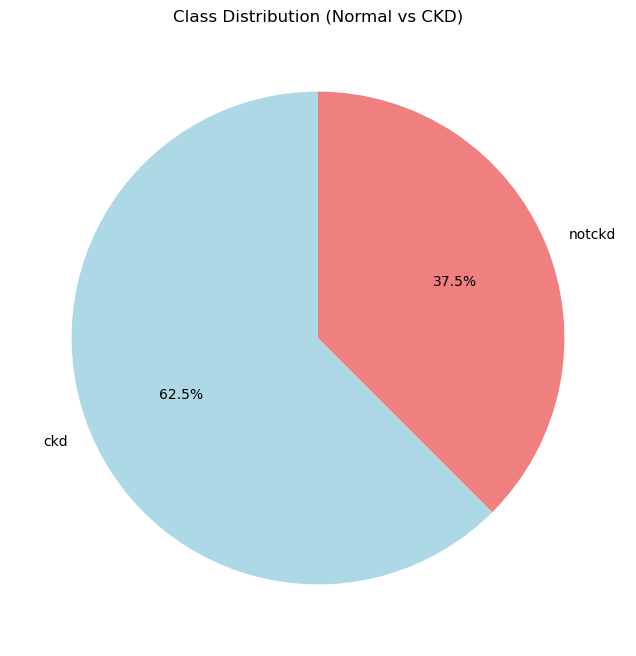

In [75]:
plt.figure(figsize=(8, 8))
classification_counts = health_data['classification'].value_counts()
classification_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Class Distribution (Normal vs CKD)')
plt.ylabel('')
plt.show()

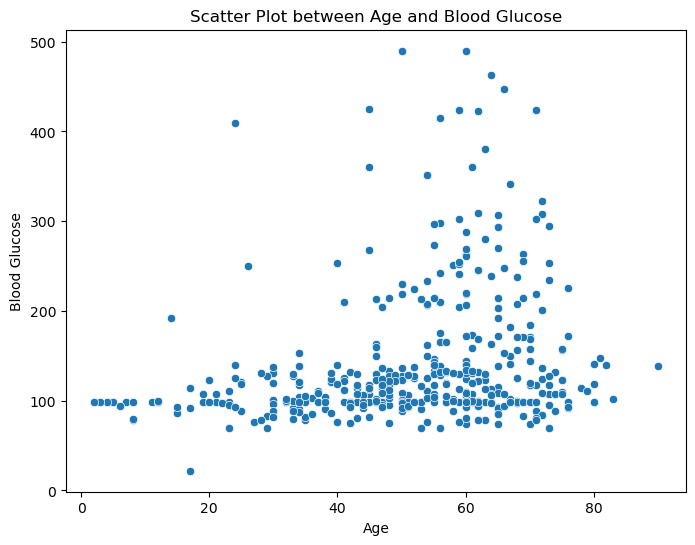

In [76]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='bgr', data=health_data)
plt.title('Scatter Plot between Age and Blood Glucose')
plt.xlabel('Age')
plt.ylabel('Blood Glucose')
plt.show()

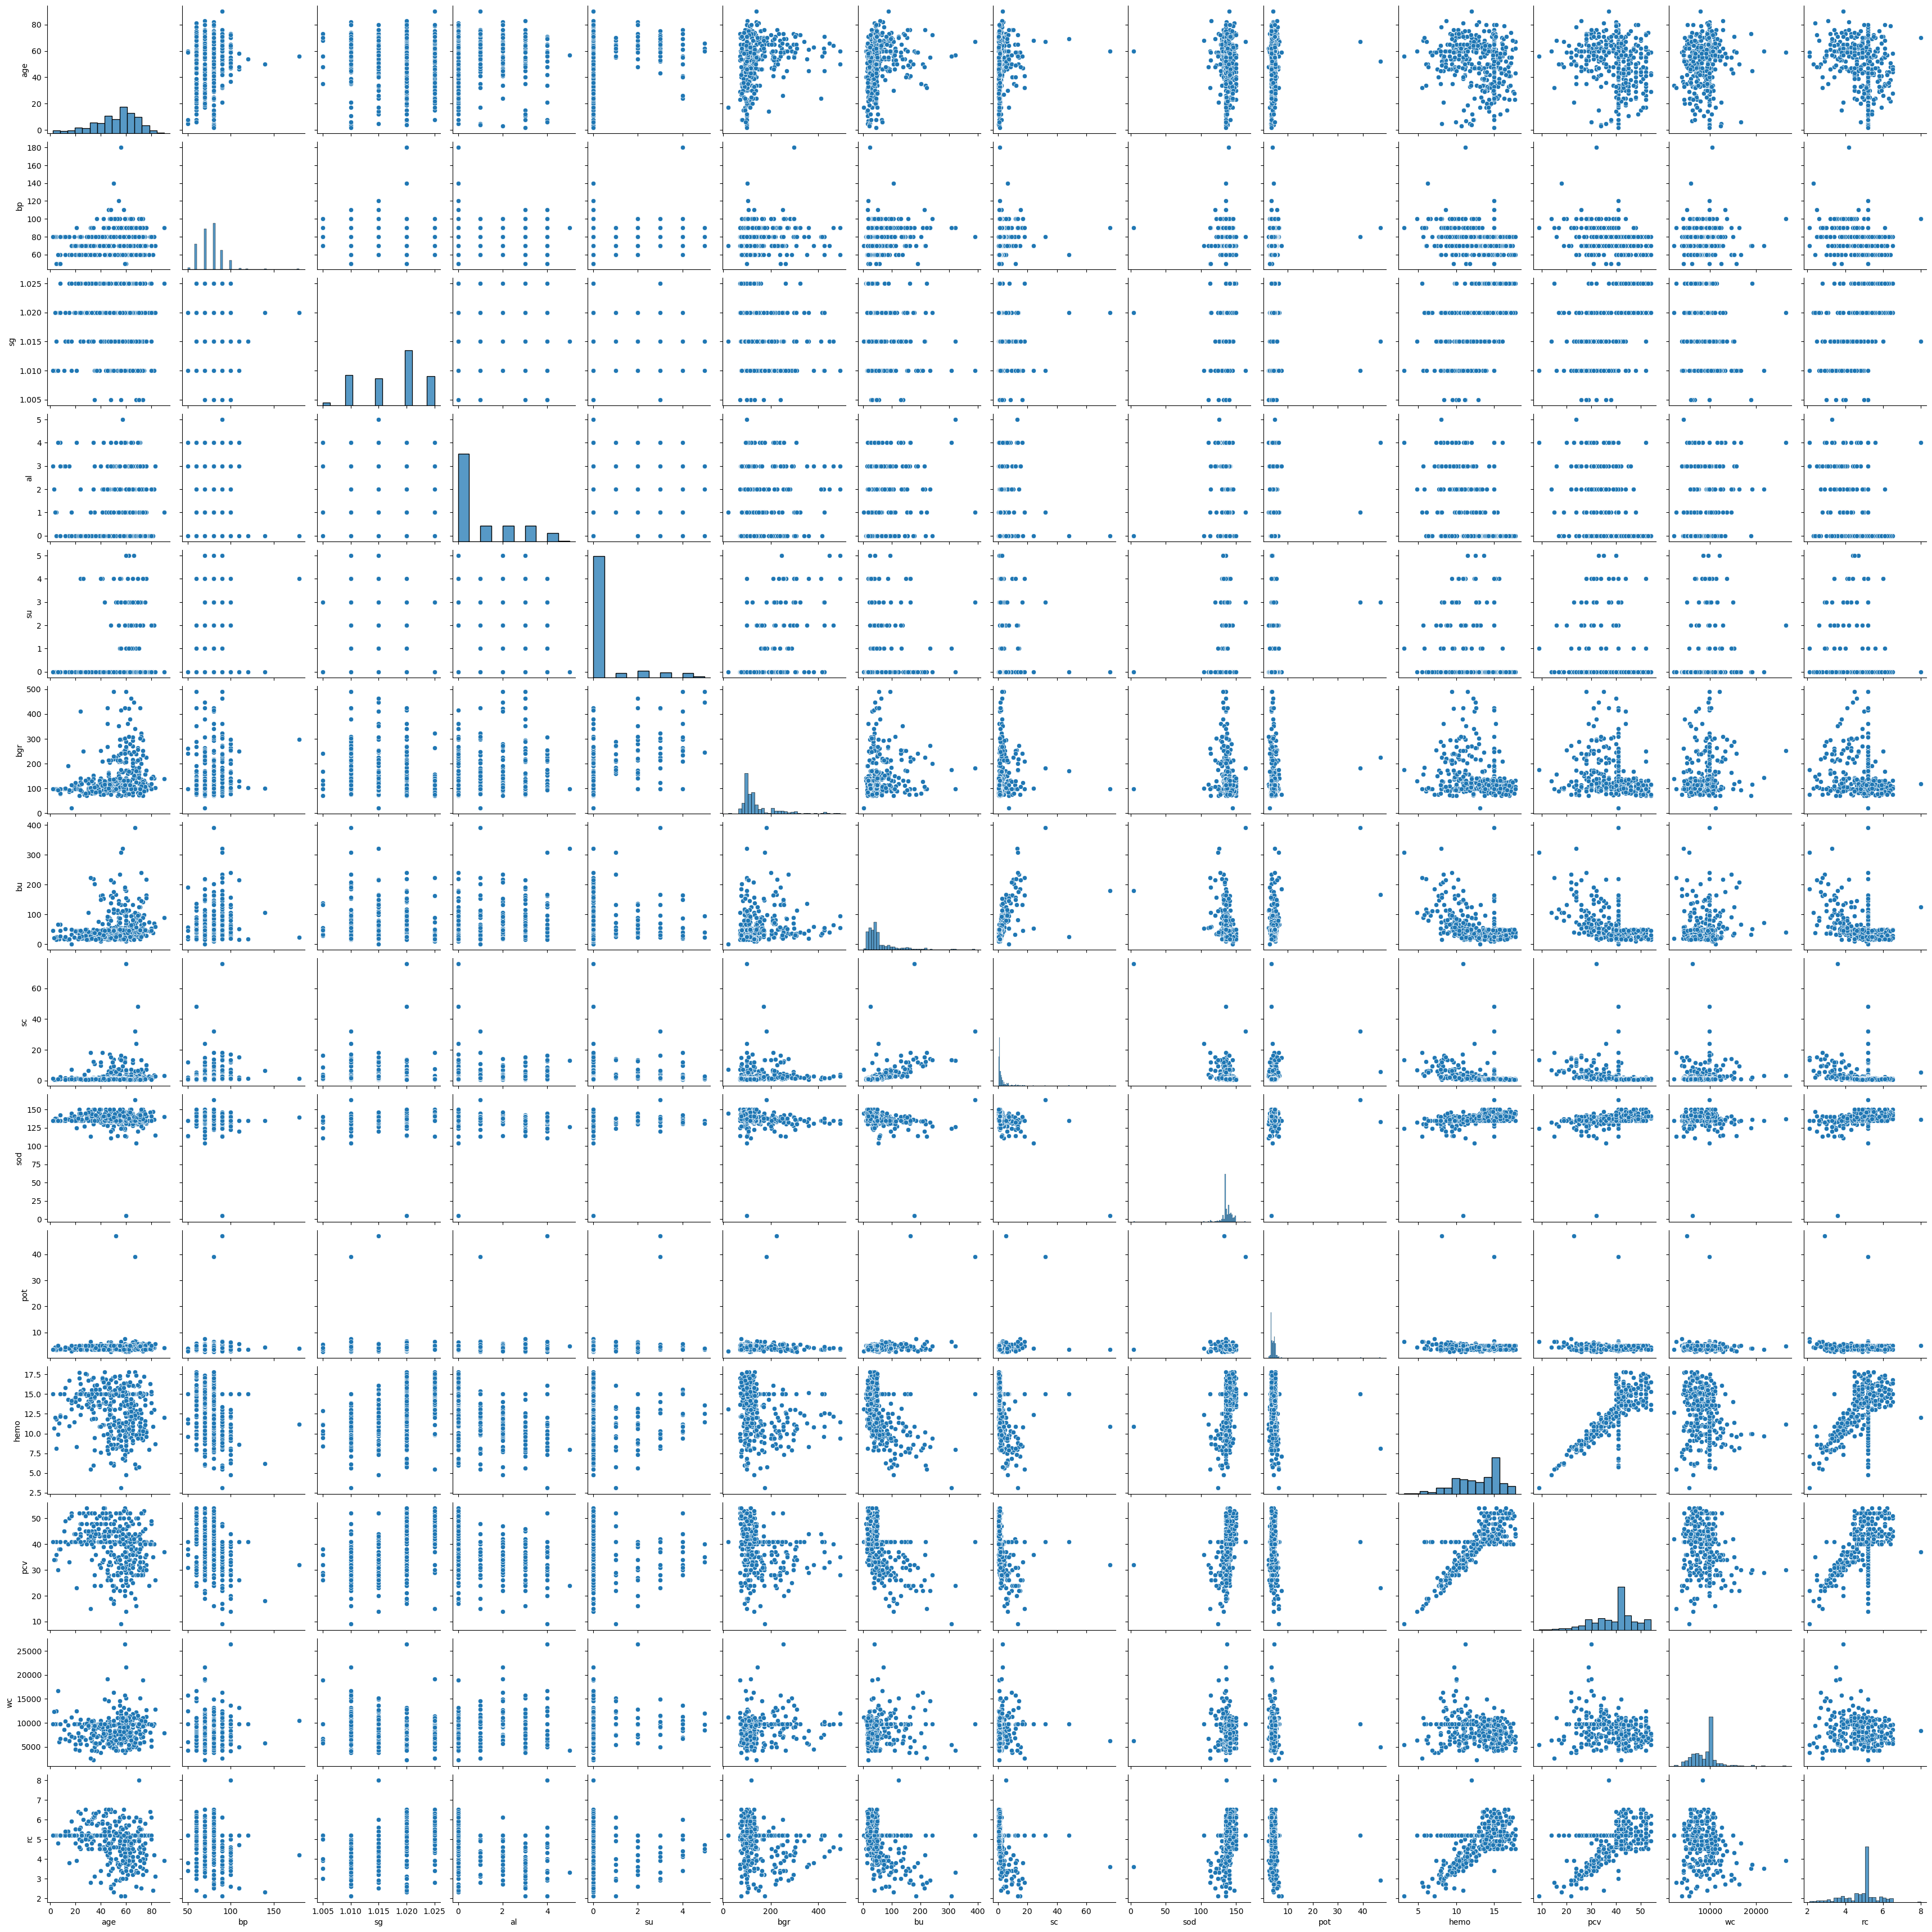

CPU times: total: 33.7 s
Wall time: 34.3 s


In [77]:
%%time
sns.pairplot(health_data)
plt.show()

<Axes: >

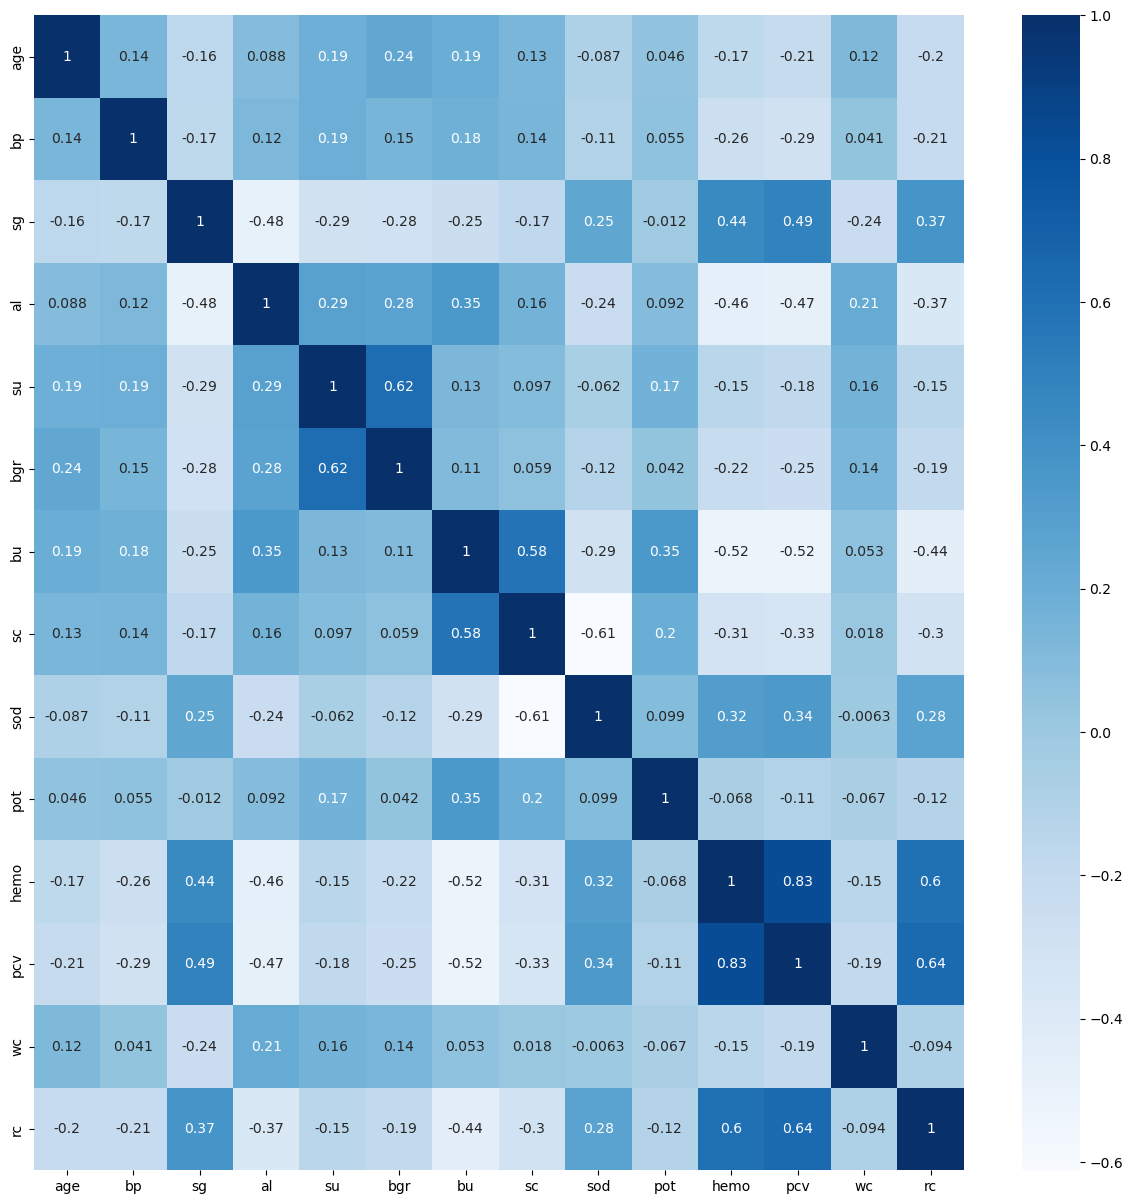

In [78]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_data, annot=True, cmap="Blues")

##  Feature Engineering / Data preprocessing 

### Feature Encoding

In [81]:
health_data['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

Using one hot encoding to encode the 'classification' column

In [83]:
health_data['classification'] = health_data['classification'].map({'ckd': 1, 'notckd': 0})

In [84]:
health_data['classification'].value_counts()

classification
1    250
0    150
Name: count, dtype: int64

In [85]:
categorical_cols

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], dtype='object')

In [86]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [87]:
label_encodings = {}
for col in categorical_cols:
    # Fit and transform the column
    health_data[col] = label_encoder.fit_transform(health_data[col])
    label_encodings[col] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

In [88]:
for col, encoding in label_encodings.items():
    print(f"Label encoding for '{col}': {encoding}")

Label encoding for 'rbc': {'abnormal': 0, 'normal': 1}
Label encoding for 'pc': {'abnormal': 0, 'normal': 1}
Label encoding for 'pcc': {'notpresent': 0, 'present': 1}
Label encoding for 'ba': {'notpresent': 0, 'present': 1}
Label encoding for 'htn': {'no': 0, 'yes': 1}
Label encoding for 'dm': {'no': 0, 'yes': 1}
Label encoding for 'cad': {'no': 0, 'yes': 1}
Label encoding for 'appet': {'good': 0, 'poor': 1}
Label encoding for 'pe': {'no': 0, 'yes': 1}
Label encoding for 'ane': {'no': 0, 'yes': 1}


In [89]:
health_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,99.0,...,38.0,6000.0,5.2,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.2,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1


### Handling Imbalance & Seperating the Target and independent variables 

The model is highly imbalanced so randomly sampling the data for further model buildup

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
X = health_data.drop(columns=['classification'])
y = health_data['classification']

In [94]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [95]:
y_resampled.value_counts()

classification
1    250
0    250
Name: count, dtype: int64

### Splitting Testing and Training Data

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [99]:
x_train.shape, x_test.shape

((400, 24), (100, 24))

In [100]:
y_train.value_counts()

classification
1    204
0    196
Name: count, dtype: int64

### Feature Scaling

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()

In [104]:
numerical_cols

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc'],
      dtype='object')

In [105]:
x_train[numerical_cols]

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
249,56.000000,90.000000,1.010,4.0,1.0,176.000000,309.000000,13.300000,124.000000,6.500000,3.100000,9.000000,5400.00000,2.100000
433,55.938128,77.915272,1.020,0.0,0.0,104.208473,27.895764,0.879153,142.833891,4.643645,16.997714,50.957636,8189.57636,4.789576
19,62.000000,60.000000,1.015,1.0,0.0,100.000000,31.000000,1.600000,135.000000,3.500000,10.300000,30.000000,5300.00000,3.700000
322,70.000000,60.000000,1.020,0.0,0.0,120.000000,40.000000,0.500000,140.000000,4.600000,16.000000,43.000000,4500.00000,4.900000
332,34.000000,70.000000,1.025,0.0,0.0,99.000000,33.000000,1.000000,150.000000,5.000000,15.300000,44.000000,10500.00000,6.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,50.000000,90.000000,1.020,0.0,0.0,89.000000,118.000000,6.100000,127.000000,4.400000,6.000000,17.000000,6500.00000,5.200000
270,23.000000,80.000000,1.025,0.0,0.0,111.000000,34.000000,1.100000,145.000000,4.000000,14.300000,41.000000,7200.00000,5.000000
348,38.000000,80.000000,1.020,0.0,0.0,99.000000,19.000000,0.500000,147.000000,3.500000,13.600000,44.000000,7300.00000,6.400000
435,30.240693,65.632756,1.020,0.0,0.0,97.171213,44.183622,0.762035,138.183622,4.111414,14.042432,48.000000,7000.00000,5.031017


In [106]:
x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])
x_train

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
249,0.312926,1.138245,-1.638909,2.617470,0.736003,1,0,1,0,0.567898,...,-3.760577,-4.012509,-1.292953,-3.426743,1,1,0,1,1,1
433,0.309120,0.201044,0.255898,-0.591689,-0.330668,1,1,0,0,-0.466525,...,1.376857,1.323286,-0.203385,-0.193040,0,0,0,0,0,0
19,0.682001,-1.188330,-0.691506,0.210601,-0.330668,1,0,1,0,-0.527163,...,-1.099022,-1.341918,-1.332011,-1.503048,1,0,1,0,0,0
322,1.174102,-1.188330,0.255898,-0.591689,-0.330668,1,1,0,0,-0.238989,...,1.008042,0.311305,-1.644480,-0.060276,0,0,0,0,0,0
332,-1.040350,-0.412805,1.203301,-0.591689,-0.330668,1,1,0,0,-0.541572,...,0.749279,0.438476,0.699033,1.382495,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.056149,1.138245,0.255898,-0.591689,-0.330668,1,1,0,0,-0.685659,...,-2.688562,-2.995141,-0.863309,0.300417,1,1,0,0,1,1
270,-1.716988,0.362720,1.203301,-0.591689,-0.330668,1,1,0,0,-0.368668,...,0.379619,0.056963,-0.589899,0.059955,0,0,0,0,0,0
348,-0.794300,0.362720,0.255898,-0.591689,-0.330668,1,1,0,0,-0.541572,...,0.120857,0.438476,-0.550841,1.743188,0,0,0,0,0,0
435,-1.271595,-0.751495,0.255898,-0.591689,-0.330668,1,1,0,0,-0.567922,...,0.284406,0.947160,-0.668016,0.097247,0,0,0,0,0,0


In [107]:
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])
x_test

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
361,-1.347913,0.362720,0.255898,-0.591689,-0.330668,1,1,0,0,-0.959424,...,0.157823,1.710186,-1.292953,1.021802,0,0,0,0,0,0
73,0.558976,1.913770,-0.691506,1.012891,-0.330668,0,0,0,0,-0.109311,...,-3.132154,-3.376654,-0.941426,0.300417,1,0,0,0,1,1
374,1.727715,0.362720,1.203301,-0.591689,-0.330668,1,1,0,0,-0.368668,...,1.118940,-0.070208,-0.277431,1.743188,0,0,0,0,0,0
155,-0.056149,-0.412805,0.255898,1.815181,-0.330668,0,1,1,1,-0.195763,...,-0.803294,-0.578892,-1.566363,0.300417,0,0,0,0,0,0
104,0.251414,1.138245,0.255898,-0.591689,-0.330668,1,1,0,0,0.092411,...,0.638381,0.056963,0.425623,0.300417,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,-0.486737,-1.188330,1.203301,-0.591689,-0.330668,1,1,0,0,-0.411894,...,1.673430,0.311305,-0.589899,0.661110,0,0,0,0,0,0
86,0.312926,0.362720,0.255898,-0.591689,-0.330668,1,1,0,0,4.011578,...,0.638381,0.056963,0.425623,0.300417,0,1,0,0,0,0
75,-2.824214,0.362720,-0.691506,0.210601,-0.330668,1,1,0,0,-0.541572,...,-1.912275,0.056963,0.425623,0.300417,0,0,0,0,0,1
438,-0.089253,0.362720,0.630674,-0.591689,-0.330668,1,1,0,0,-0.302006,...,1.042558,0.764065,-0.589899,0.731124,0,0,0,0,0,0


## Model Development

### Importing Models

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [111]:
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()
svm_model = SVC()
nb_model = GaussianNB()

In [112]:
models = [lr_model,dt_model,rf_model,knn_model,svm_model,nb_model]
models

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 KNeighborsClassifier(),
 SVC(),
 GaussianNB()]

### Model Training

In [114]:
for model in models:
    model.fit(x_train,y_train)

### Model Evaluation

#### Classification Report

In [117]:
from sklearn.metrics import classification_report

In [118]:
for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(model.__class__.__name__)
    print(classification_report(y_test,y_pred))
    print("-------------------------------------------------------")
    print(" ")

LogisticRegression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        46

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

-------------------------------------------------------
 
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        54
           1       0.98      0.93      0.96        46

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

-------------------------------------------------------
 
RandomForestClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        46

 

#### Confusion Matrix

In [120]:
from sklearn.metrics import confusion_matrix

LogisticRegression


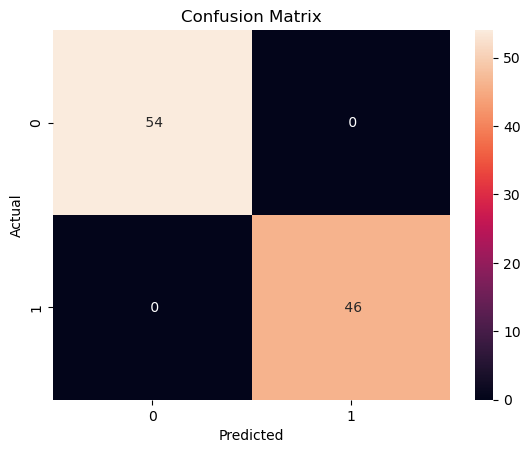

-------------------------------------------------------
 
DecisionTreeClassifier


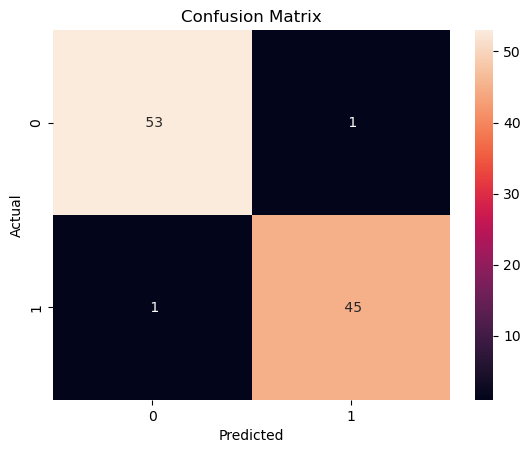

-------------------------------------------------------
 
RandomForestClassifier


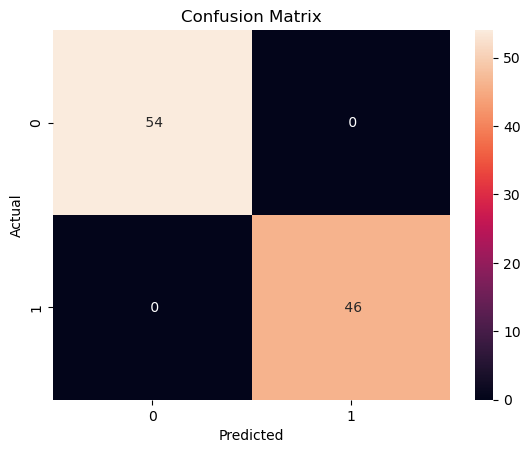

-------------------------------------------------------
 
KNeighborsClassifier


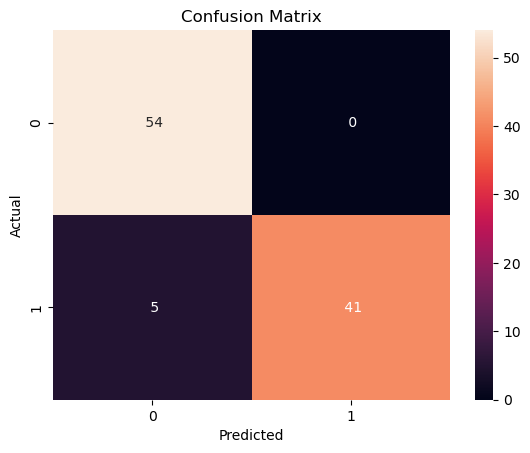

-------------------------------------------------------
 
SVC


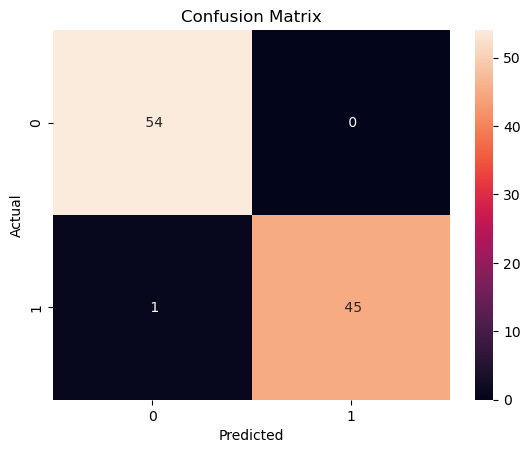

-------------------------------------------------------
 
GaussianNB


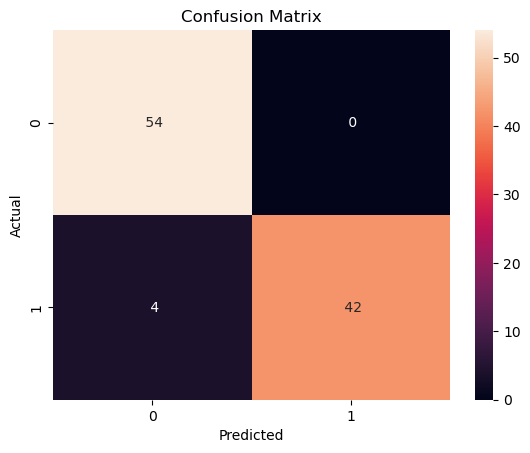

-------------------------------------------------------
 


In [121]:
for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(model.__class__.__name__)
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm, annot=True, fmt= " ")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("-------------------------------------------------------")
    print(" ")

### Cross Validation

In [123]:
from sklearn.model_selection import cross_val_score

In [124]:
%%time
for model in models:
    acc_ls =  cross_val_score(model,X,y, scoring='accuracy', cv=5)
    mean_acc = round(acc_ls.mean()*100,2)
    modelname = model.__class__.__name__
    print(f"{modelname}'s Cross Validation Accuracy is = {mean_acc}%")
    print("-------------------------------------------------------")

LogisticRegression's Cross Validation Accuracy is = 88.5%
-------------------------------------------------------
DecisionTreeClassifier's Cross Validation Accuracy is = 96.0%
-------------------------------------------------------
RandomForestClassifier's Cross Validation Accuracy is = 99.75%
-------------------------------------------------------
KNeighborsClassifier's Cross Validation Accuracy is = 71.25%
-------------------------------------------------------
SVC's Cross Validation Accuracy is = 65.5%
-------------------------------------------------------
GaussianNB's Cross Validation Accuracy is = 96.5%
-------------------------------------------------------
CPU times: total: 2.88 s
Wall time: 1.22 s


### Hyperparameter Tuning

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy']
}

In [128]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

In [129]:
%%time
grid_search.fit(x_train, y_train)

CPU times: total: 19 s
Wall time: 19.3 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, None],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [130]:
# Best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)

Best hyperparameters found:  {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}


In [131]:
best_estimator = grid_search.best_estimator_
best_estimator.fit(x_train,y_train)
y_pred_best = best_estimator.predict(x_test)
print(classification_report(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        46

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



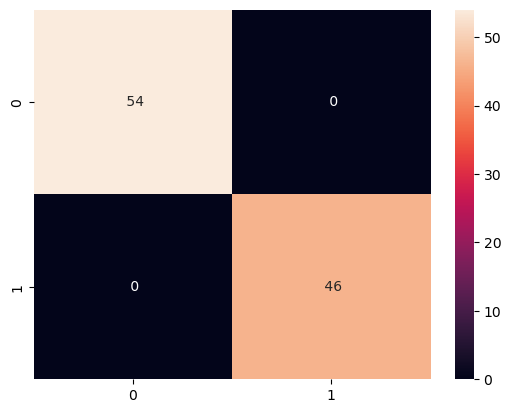

In [132]:
cm = confusion_matrix(y_test,y_pred_best)
sns.heatmap(cm, annot=True, fmt= " ")
plt.show()

### Customizing predictions

In [254]:
def predict_kidney_disease(model, scaler, numerical_cols):
    # Collecting user input
    age_in = float(input("Enter age = "))
    bp_in = float(input("Enter bp = "))
    sg_in = float(input("Enter sg = "))
    al_in = float(input("Enter al = "))
    su_in = float(input("Enter su = "))

    print(" ")
    print("Choose rbc:")
    print("1. Normal")
    print("2. Abnormal")
    rbc_in = input("Enter: ")
    while rbc_in not in ['1', '2']:
        print("Invalid input. Please enter 1 or 2.")
        rbc_in = input("Enter: ")

    rbc_in = 'normal' if rbc_in == '1' else 'abnormal'
    
    print(" ")
    print("Choose pc:")
    print("1. Normal")
    print("2. Abnormal")
    pc_in = input("Enter: ")
    while pc_in not in ['1', '2']:
        print("Invalid input. Please enter 1 or 2.")
        pc_in = input("Enter: ")

    pc_in = 'normal' if pc_in == '1' else 'abnormal'

    print(" ")
    print("Choose pcc:")
    print("1. present")
    print("2. notpresent")
    pcc_in = input("Enter: ")
    while pcc_in not in ['1', '2']:
        print("Invalid input. Please enter 1 or 2.")
        pcc_in = input("Enter: ")

    pcc_in = 'present' if pcc_in == '1' else 'notpresent'

    print(" ")
    print("Choose ba:")
    print("1. present")
    print("2. notpresent")
    ba_in = input("Enter: ")
    while ba_in not in ['1', '2']:
        print("Invalid input. Please enter 1 or 2.")
        ba_in = input("Enter: ")

    ba_in = 'present' if ba_in == '1' else 'notpresent'

    bgr_in = float(input("Enter bgr = "))
    bu_in = float(input("Enter bu = "))
    sc_in = float(input("Enter sc = "))
    sod_in = float(input("Enter sod = "))
    pot_in = float(input("Enter pot = "))
    hemo_in = float(input("Enter hemo = "))
    pcv_in = float(input("Enter pcv = "))
    wc_in = float(input("Enter wc = "))
    rc_in = float(input("Enter rc = "))

    print(" ")
    print("Choose htn:")
    print("1. yes")
    print("2. no")
    htn_in = input("Enter: ")
    while htn_in not in ['1', '2']:
        print("Invalid input. Please enter 1 or 2.")
        htn_in = input("Enter: ")

    htn_in = 'yes' if htn_in == '1' else 'no'

    print(" ")
    print("Choose dm:")
    print("1. yes")
    print("2. no")
    dm_in = input("Enter: ")
    while dm_in not in ['1', '2']:
        print("Invalid input. Please enter 1 or 2.")
        dm_in = input("Enter: ")

    dm_in = 'yes' if dm_in == '1' else 'no'

    print(" ")
    print("Choose cad:")
    print("1. yes")
    print("2. no")
    cad_in = input("Enter: ")
    while cad_in not in ['1', '2']:
        print("Invalid input. Please enter 1 or 2.")
        cad_in = input("Enter: ")

    cad_in = 'yes' if cad_in == '1' else 'no'

    print(" ")
    print("Choose appet:")
    print("1. poor")
    print("2. good")
    appet_in = input("Enter: ")
    while appet_in not in ['1', '2']:
        print("Invalid input. Please enter 1 or 2.")
        appet_in = input("Enter: ")

    appet_in = 'poor' if appet_in == '1' else 'good'
    
    print(" ")
    print("Choose pe:")
    print("1. yes")
    print("2. no")
    pe_in = input("Enter: ")
    while pe_in not in ['1', '2']:
        print("Invalid input. Please enter 1 or 2.")
        pe_in = input("Enter: ")

    pe_in = 'yes' if pe_in == '1' else 'no'

    print(" ")
    print("Choose ane:")
    print("1. yes")
    print("2. no")
    ane_in = input("Enter: ")
    while ane_in not in ['1', '2']:
        print("Invalid input. Please enter 1 or 2.")
        ane_in = input("Enter: ")

    ane_in = 'yes' if ane_in == '1' else 'no'

    input_data = {
        "age": [age_in],
        "bp": [bp_in],
        "sg": [sg_in],
        "al": [al_in],
        "su": [su_in],
        "rbc": [rbc_in],
        "pc": [pc_in],
        "pcc": [pcc_in],
        "ba": [ba_in],
        "bgr": [bgr_in],
        "bu": [bu_in],
        "sc": [sc_in],
        "sod": [sod_in],
        "pot": [pot_in],
        "hemo": [hemo_in],
        "pcv": [pcv_in],
        "wc": [wc_in],
        "rc": [rc_in],
        "htn": [htn_in],
        "dm": [dm_in],
        "cad": [cad_in],
        "appet": [appet_in],
        "pe": [pe_in],
        "ane": [ane_in]
    }
    
    input_df = pd.DataFrame(input_data)
    input_df_encoded = pd.get_dummies(input_df, columns=categorical_cols)
    input_df_encoded[numerical_cols] = scaler.transform(input_df_encoded[numerical_cols])
    
    input_for_prediction = input_df_encoded.values.reshape(1, -1)
    prediction = model.predict(input_for_prediction)
    
    if prediction[0] == 1:
        return "Patient has Chronic Kidney Disease (CKD)"
    else:
        return "Patient is healthy"

#### Test Case - 1 

In [257]:
result = predict_kidney_disease(best_estimator, scaler, numerical_cols)
print("-------------------------------------- ")
print(result)

Enter age =  48
Enter bp =  70
Enter sg =  1.005
Enter al =  4
Enter su =  0


 
Choose rbc:
1. Normal
2. Abnormal


Enter:  1


 
Choose pc:
1. Normal
2. Abnormal


Enter:  2


 
Choose pcc:
1. present
2. notpresent


Enter:  1


 
Choose ba:
1. present
2. notpresent


Enter:  2
Enter bgr =  117
Enter bu =  56
Enter sc =  3.8
Enter sod =  111
Enter pot =  2.5
Enter hemo =  11.2
Enter pcv =  32
Enter wc =  6700
Enter rc =  3.9


 
Choose htn:
1. yes
2. no


Enter:  1


 
Choose dm:
1. yes
2. no


Enter:  2


 
Choose cad:
1. yes
2. no


Enter:  2


 
Choose appet:
1. poor
2. good


Enter:  1


 
Choose pe:
1. yes
2. no


Enter:  1


 
Choose ane:
1. yes
2. no


Enter:  1


-------------------------------------- 
Patient has Chronic Kidney Disease (CKD)
